In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df1 =pd.read_csv("train.csv")
df1.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [ ]:
df1.shape

(9557, 143)

In [ ]:
df1.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
df1

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [ ]:
df = df1

In [ ]:
def region (row):
   if row['lugar1'] == 1 :
      return 1
   if row['lugar2'] == 1 :
      return 2
   if row['lugar3'] == 1:
      return 3
   if row['lugar4']  == 1:
      return 4
   if row['lugar5'] == 1:
      return 5
   if row['lugar6'] == 1:
      return 6
   return 0

In [ ]:
df['Region'] = df.apply (lambda row: region(row), axis=1)

In [ ]:
df.drop(['lugar1', 'lugar2','lugar3','lugar4','lugar5','lugar6'], axis=1,inplace =True)

In [ ]:

def area (row):
   if row['area1'] == 1 :
      return 1
   if row['area2'] == 1 :
      return 2
   return 0

In [ ]:
df['Area'] = df.apply (lambda row: area(row), axis=1)

In [ ]:
df.drop(['area1', 'area2'], axis=1,inplace =True)

In [ ]:
def edu (row):
   if row['instlevel1'] == 1 :
      return 1
   if row['instlevel2'] == 1 :
      return 2
   if row['instlevel3'] == 1:
      return 3
   if row['instlevel4']  == 1:
      return 4
   if row['instlevel5'] == 1:
      return 5
   if row['instlevel6'] == 1:
      return 6
   if row['instlevel7']  == 1:
      return 7
   if row['instlevel8'] == 1:
      return 8
   if row['instlevel9'] == 1:
      return 9
   return 0

In [ ]:
df['Education'] = df.apply (lambda row: edu(row), axis=1)

In [ ]:
df.drop(['instlevel1','instlevel2','instlevel3','instlevel4', 'instlevel5','instlevel6','instlevel7','instlevel8','instlevel9'], axis=1,inplace =True)

In [ ]:
def wall (row):
   if row['paredblolad'] == 1 :
      return 1
   if row['paredzocalo'] == 1 :
      return 2
   if row['paredpreb'] == 1:
      return 3
   if row['pareddes']  == 1:
      return 4
   if row['paredmad'] == 1:
      return 5
   if row['paredzinc'] == 1:
      return 6
   if row['paredfibras']  == 1:
      return 7
   if row['paredother'] == 1:
      return 8
   return 0

In [ ]:
df['Wall Type'] = df.apply (lambda row: wall(row), axis=1)

In [ ]:
df.drop(['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother'], axis=1,inplace =True)

In [ ]:
def floor(row):
   if row['pisomoscer'] == 1 :
      return 1
   if row['pisocemento'] == 1 :
      return 2
   if row['pisoother'] == 1:
      return 3
   if row['pisonatur']  == 1:
      return 4
   if row['pisonotiene'] == 1:
      return 5
   if row['pisomadera'] == 1:
      return 6
   return 0

In [ ]:
df['Floor Type'] = df.apply (lambda row: floor(row), axis=1)

In [ ]:
df.drop(['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera'], axis=1,inplace =True)

In [ ]:
def roof (row):
   if row['techozinc'] == 1 :
      return 1
   if row['techoentrepiso'] == 1 :
      return 2
   if row['techocane'] == 1:
      return 3
   if row['techootro']  == 1:
      return 4
   return 0

In [ ]:
df['Roof Type'] = df.apply (lambda row: roof(row), axis=1)

In [ ]:
df.drop(['techozinc','techoentrepiso','techocane','techootro'], axis=1,inplace =True)

In [ ]:
def water (row):
   if row['abastaguadentro'] == 1 :
      return 1
   if row['abastaguafuera'] == 1 :
      return 2
   if row['abastaguano'] == 1 :
      return 3
   return 0

In [ ]:
df['Water'] = df.apply (lambda row: water (row), axis=1)

In [ ]:
df.drop(['abastaguadentro','abastaguafuera','abastaguano'], axis=1,inplace =True)

In [ ]:
def ele (row):
   if row['public'] == 1 :
      return 1
   if row['planpri'] == 1 :
      return 2
   if row['noelec'] == 1:
      return 3
   if row['coopele']  == 1:
      return 4
   return 0

In [ ]:
df['Electricity'] = df.apply (lambda row: ele (row), axis=1)

In [ ]:
df.drop(['public','planpri','noelec','coopele'],axis=1,inplace =True)

In [ ]:
def san (row):
   if row['sanitario1'] == 1 :
      return 1
   if row['sanitario2'] == 1 :
      return 2
   if row['sanitario3'] == 1:
      return 3
   if row['sanitario5']  == 1:
      return 4
   if row['sanitario6']  == 1:
      return 5
   return 0

In [ ]:
df['Sanitary'] = df.apply (lambda row: san (row), axis=1)

In [ ]:
df.drop(["sanitario1",'sanitario2','sanitario3','sanitario5','sanitario6'],axis=1,inplace =True)

In [ ]:
def cook (row):
   if row['energcocinar1'] == 1 :
      return 1
   if row['energcocinar2'] == 1 :
      return 2
   if row['energcocinar3']  == 1:
      return 3
   if row['energcocinar4']  == 1:
      return 4
   return 0

In [ ]:
df['Cooking Energy'] = df.apply (lambda row: cook (row), axis=1)

In [ ]:
df.drop(['energcocinar1','energcocinar2','energcocinar3','energcocinar4'],axis=1,inplace =True)

In [ ]:
def disp (row):
   if row['elimbasu1'] == 1 :
      return 1
   if row['elimbasu2'] == 1 :
      return 2
   if row['elimbasu3']  == 1:
      return 3
   if row['elimbasu4']  == 1:
      return 4
   if row['elimbasu5']  == 1:
      return 5
   if row['elimbasu6']  == 1:
      return 6
   return 0

In [ ]:
df['Rubbish Disposal'] = df.apply (lambda row: disp (row), axis=1)

In [ ]:
df.drop(['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6'],axis=1,inplace =True)

In [ ]:
def wcond (row):
   if row['epared1'] == 1 :
      return 1
   if row['epared2'] == 1 :
      return 2
   if row['epared3']  == 1:
      return 3
   return 0

In [ ]:
df['Wall Cond'] = df.apply (lambda row: wcond (row), axis=1)

In [ ]:
df.drop(['epared1','epared2','epared3'],axis=1,inplace =True)

In [ ]:
def rcond (row):
   if row['etecho1'] == 1 :
      return 1
   if row['etecho2'] == 1 :
      return 2
   if row['etecho3']  == 1:
      return 3
   return 0

In [ ]:
df['Roof Cond'] = df.apply (lambda row: rcond (row), axis=1)

In [ ]:
df.drop(['etecho1','etecho2','etecho3'],axis=1,inplace =True)

In [ ]:
def fcond (row):
   if row['eviv1'] == 1 :
      return 1
   if row['eviv2'] == 1 :
      return 2
   if row['eviv3']  == 1:
      return 3
   return 0

In [ ]:
df['Floor Cond'] = df.apply (lambda row: fcond (row), axis=1)

In [ ]:
df.drop(['eviv1','eviv2','eviv3'],axis=1,inplace =True)

In [ ]:
def sts (row):
   if row['estadocivil1'] == 1 :
      return 1
   if row['estadocivil2'] == 1 :
      return 2
   if row['estadocivil3'] == 1:
      return 3
   if row['estadocivil4']  == 1:
      return 4
   if row['estadocivil5']  == 1:
      return 5
   if row['estadocivil6']  == 1:
      return 6
   if row['estadocivil7']  == 1:
      return 7
   return 0

In [ ]:
df['Status'] = df.apply (lambda row: sts (row), axis=1)

In [ ]:
df.drop(['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7'],axis=1,inplace =True)

In [ ]:
def fam (row):
   if row['parentesco1'] == 1 :
      return 1
   if row['parentesco2'] == 1 :
      return 2
   if row['parentesco3'] == 1:
      return 3
   if row['parentesco4']  == 1:
      return 4
   if row['parentesco5']  == 1:
      return 5
   if row['parentesco6']  == 1:
      return 6
   if row['parentesco7']  == 1:
      return 7
   if row['parentesco8']  == 1:
      return 8
   if row['parentesco9']  == 1:
      return 9
   if row['parentesco10']  == 1:
      return 10
   if row['parentesco11']  == 1:
      return 11
   if row['parentesco12']  == 1:
      return 12
   return 0

In [ ]:
df['Relationship'] = df.apply (lambda row: fam (row), axis=1)

In [ ]:
df.drop(['parentesco1','parentesco2','parentesco3','parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10','parentesco11','parentesco12'],axis=1,inplace =True)

In [ ]:
def house (row):
   if row['tipovivi1'] == 1 :
      return 1
   if row['tipovivi2'] == 1 :
      return 2
   if row['tipovivi3'] == 1:
      return 3
   if row['tipovivi4']  == 1:
      return 4
   if row['tipovivi5']  == 1:
      return 5

   return 0

In [ ]:
df['House'] = df.apply (lambda row: house (row), axis=1)

In [ ]:

df.drop(['tipovivi1','tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5'],axis=1,inplace =True)

In [ ]:
def gen (row):
   if row['male'] == 1 :
      return 0
   if row['female'] == 1 :
      return 1
   return 'NaN'

In [ ]:
df['Gender'] = df.apply (lambda row: gen (row), axis=1)

In [ ]:

df.drop(['male','female'],axis=1,inplace =True)

In [ ]:
df.shape


(9557, 69)

In [ ]:
df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2',
       'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize',
       'cielorazo', 'dis', 'idhogar', 'hogar_nin', 'hogar_adul', 'hogar_mayor',
       'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms',
       'overcrowding', 'computer', 'television', 'mobilephone', 'qmobilephone',
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq', 'Target', 'Region', 'Area', 'Education', 'Wall Type',
       'Floor Type', 'Roof Type', 'Water', 'Electricity', 'Sanitary',
       'Cooking Energy', 'Rubbish Disposal', 'Wall Cond', 'Roof Cond',
       'Floor Cond', 'Status', 'Relationship', 'House', 'Gender'],
      dtype='object')

In [ ]:
df.drop(['SQBovercrowding','SQBhogar_nin','SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBdependency','SQBmeaned','agesq'],axis=1,inplace =True)

In [ ]:
df.isna().sum()

Id                     0
v2a1                6860
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
refrig                 0
v18q                   0
v18q1               7342
r4h1                   0
r4h2                   0
r4h3                   0
r4m1                   0
r4m2                   0
r4m3                   0
r4t1                   0
r4t2                   0
r4t3                   0
tamhog                 0
tamviv                 0
escolari               0
rez_esc             7928
hhsize                 0
cielorazo              0
dis                    0
idhogar                0
hogar_nin              0
hogar_adul             0
hogar_mayor            0
hogar_total            0
dependency             0
edjefe                 0
edjefa                 0
meaneduc               5
bedrooms               0
overcrowding           0
computer               0
television             0
mobilephone            0
qmobilephone           0


In [ ]:
#df=df.fillna({'v2a1' : v2a1.mean()})
df['v2a1'].fillna((df['v2a1'].mean()), inplace=True)

In [ ]:
df['rez_esc'].fillna((df['rez_esc'].mean()), inplace=True)

In [ ]:
df['v18q1'].fillna(0, inplace=True)

In [ ]:
df['meaneduc'].fillna((df['meaneduc'].mean()), inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df.shape

(9557, 60)

In [ ]:
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,Region,Area,Education,Wall Type,Floor Type,Roof Type,Water,Electricity,Sanitary,Cooking Energy,Rubbish Disposal,Wall Cond,Roof Cond,Floor Cond,Status,Relationship,House,Gender
0,ID_279628684,190000.000000,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.459791,1,1,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,1,1.000000,0,0,1,1,43,4,1,1,4,1,1,2,1,1,2,3,1,2,1,1,4,1,3,0
1,ID_f29eb3ddd,135000.000000,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.459791,1,1,0,0e5d7a658,0,1,1,1,8,12,no,12.0,1,1.000000,0,0,1,1,67,4,1,1,8,5,6,1,1,1,2,2,1,2,2,2,4,1,3,0
2,ID_68de51c94,165231.606971,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.459791,1,1,1,2c7317ea8,0,1,1,1,8,no,11,11.0,2,0.500000,0,0,0,0,92,4,1,1,5,5,1,1,1,1,2,2,1,2,3,3,6,1,1,1
3,ID_d671db89c,180000.000000,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.000000,4,1,0,2b58d945f,2,2,0,4,yes,11,no,11.0,3,1.333333,0,0,1,3,17,4,1,1,4,1,1,1,1,1,2,2,1,3,3,3,7,3,3,0
4,ID_d56d6f5f5,180000.000000,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.459791,4,1,0,2b58d945f,2,2,0,4,yes,11,no,11.0,3,1.333333,0,0,1,3,37,4,1,1,5,1,1,1,1,1,2,2,1,3,3,3,2,2,3,1


In [ ]:
df.isna().sum()

Id                  0
v2a1                0
hacdor              0
rooms               0
hacapo              0
v14a                0
refrig              0
v18q                0
v18q1               0
r4h1                0
r4h2                0
r4h3                0
r4m1                0
r4m2                0
r4m3                0
r4t1                0
r4t2                0
r4t3                0
tamhog              0
tamviv              0
escolari            0
rez_esc             0
hhsize              0
cielorazo           0
dis                 0
idhogar             0
hogar_nin           0
hogar_adul          0
hogar_mayor         0
hogar_total         0
dependency          0
edjefe              0
edjefa              0
meaneduc            0
bedrooms            0
overcrowding        0
computer            0
television          0
mobilephone         0
qmobilephone        0
age                 0
Target              0
Region              0
Area                0
Education           0
Wall Type 

In [ ]:
df.shape

(9557, 60)

In [ ]:
df.dtypes

Id                   object
v2a1                float64
hacdor                int64
rooms                 int64
hacapo                int64
v14a                  int64
refrig                int64
v18q                  int64
v18q1               float64
r4h1                  int64
r4h2                  int64
r4h3                  int64
r4m1                  int64
r4m2                  int64
r4m3                  int64
r4t1                  int64
r4t2                  int64
r4t3                  int64
tamhog                int64
tamviv                int64
escolari              int64
rez_esc             float64
hhsize                int64
cielorazo             int64
dis                   int64
idhogar              object
hogar_nin             int64
hogar_adul            int64
hogar_mayor           int64
hogar_total           int64
dependency           object
edjefe               object
edjefa               object
meaneduc            float64
bedrooms              int64
overcrowding        

In [ ]:
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,Region,Area,Education,Wall Type,Floor Type,Roof Type,Water,Electricity,Sanitary,Cooking Energy,Rubbish Disposal,Wall Cond,Roof Cond,Floor Cond,Status,Relationship,House,Gender
count,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.325416,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.677409,0.057549,1.406613,2.592445,0.284085,3.999058,9.231523,2.739981,1.605380,0.102124,0.284608,0.975306,2.821492,34.303547,3.302292,2.244533,1.285445,3.877263,2.026473,1.623208,1.023648,1.03882,1.335566,2.798682,2.556765,1.209794,2.467720,2.455164,2.545046,4.228838,2.711834,1.843989,0.516585
std,7.991617e+04,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.697118,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.390690,1.772216,0.467492,0.232902,1.366185,1.166074,0.597163,1.772216,4.166603,0.944507,0.819946,0.302827,0.451251,0.155199,1.483249,21.612261,1.009565,1.748453,0.451650,2.244593,1.468032,1.326161,0.237420,0.21079,0.946278,0.463017,0.592302,0.607299,0.673707,0.710505,0.670950,2.286797,2.055081,1.258724,0.499751
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.652316e+05,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.459791,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,17.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.652316e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,4.000000,4.000000,4.000000,6.000000,0.459791,4.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,9.000000,3.000000,1.500000,0.000000,0.000000,1.000000,3.000000,31.000000,4.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
75%,1.652316e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,5.000000,11.000000,0.459791,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,5.000000,11.500000,3.000000,2.000000,0.000000,1.000000,1.000000,4.000000,51.000000,4.000000,4.000000,2.000000,5.0

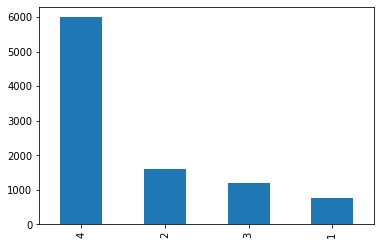

In [ ]:
df.Target.value_counts().plot(kind='bar')

In [ ]:
for columns in df.columns:
    if (df[columns].dtype == "object"):
        (df[columns], uniques) = pd.factorize(df[columns])

In [ ]:
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,Region,Area,Education,Wall Type,Floor Type,Roof Type,Water,Electricity,Sanitary,Cooking Energy,Rubbish Disposal,Wall Cond,Roof Cond,Floor Cond,Status,Relationship,House,Gender
0,0,190000.000000,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.459791,1,1,0,0,0,1,0,1,0,0,0,10.0,1,1.000000,0,0,1,1,43,4,1,1,4,1,1,2,1,1,2,3,1,2,1,1,4,1,3,0
1,1,135000.000000,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.459791,1,1,0,1,0,1,1,1,1,1,0,12.0,1,1.000000,0,0,1,1,67,4,1,1,8,5,6,1,1,1,2,2,1,2,2,2,4,1,3,0
2,2,165231.606971,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.459791,1,1,1,2,0,1,1,1,1,2,1,11.0,2,0.500000,0,0,0,0,92,4,1,1,5,5,1,1,1,1,2,2,1,2,3,3,6,1,1,1
3,3,180000.000000,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.000000,4,1,0,3,2,2,0,4,2,3,0,11.0,3,1.333333,0,0,1,3,17,4,1,1,4,1,1,1,1,1,2,2,1,3,3,3,7,3,3,0
4,4,180000.000000,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.459791,4,1,0,3,2,2,0,4,2,3,0,11.0,3,1.333333,0,0,1,3,37,4,1,1,5,1,1,1,1,1,2,2,1,3,3,3,2,2,3,1


In [ ]:
X=df.drop('Target',axis=1)
y=df["Target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
accuracy_score(y_test, pred_rf)

0.9450836820083682

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           1       0.96      0.85      0.90       132
           2       0.95      0.85      0.89       320
           3       0.95      0.87      0.91       239
           4       0.94      1.00      0.97      1221

    accuracy                           0.95      1912
   macro avg       0.95      0.89      0.92      1912
weighted avg       0.95      0.95      0.94      1912



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=100)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_sm.shape

(19100, 59)

In [ ]:
y_train_sm.shape

(19100,)

In [ ]:
y_train_sm.value_counts()

2    4775
4    4775
1    4775
3    4775
Name: Target, dtype: int64

In [ ]:
rf_s = RandomForestClassifier()
rf_s.fit(X_train_sm, y_train_sm)

pred_rf_s = rf_s.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_rf)

0.9497907949790795

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           1       0.93      0.92      0.92       132
           2       0.96      0.85      0.90       320
           3       0.93      0.89      0.91       239
           4       0.95      0.99      0.97      1221

    accuracy                           0.95      1912
   macro avg       0.94      0.91      0.93      1912
weighted avg       0.95      0.95      0.95      1912

